# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
# import stuff

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os

import matplotlib.pyplot as plt

import torch
nn = torch.nn
F = torch.nn.functional

from torchvision import datasets, transforms

import numpy as np

import cv2

import splitfolders 


In [3]:

data_train = 'landmark_images/train' #this is where the raw data is 

dir_train = 'images/train'
dir_test = 'images/test'
dir_val= 'images/val'

if os.path.exists(dir_train) == False:
    splitfolders.ratio(data_train, output="images", seed=666, ratio=(.8, .1, .1), group_prefix=None) 





In [4]:
label_map = {}

for index,i in enumerate(os.listdir(dir_test)): 
    # print(index,i[3:])
    label_map[index] = i[3:]


print(label_map[0])

Haleakala_National_Park


In [5]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# train
# maybe add a new more transforms
# https://pytorch.org/vision/stable/transforms.html
transform0 = transforms.Compose([transforms.RandomRotation(30),
                                        transforms.RandomResizedCrop(64),
                                        # transforms.Grayscale(),
                                        transforms.RandomAdjustSharpness(1, p=1),
                                        transforms.RandomVerticalFlip(),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor()]) 
# test 
transform1 = transforms.Compose([transforms.Resize(300),
                                        transforms.CenterCrop(64),
                                        # transforms.Grayscale(),
                                        transforms.ToTensor()])

loaders_scratch = {}
loaders = [
        {
            'name':'train',
            'dir': dir_train,
            'transform': transform0,
        },
        {
            'name':'valid',
            'dir': dir_val,
            'transform': transform0,
        },
        {
            'name':'test',
            'dir': dir_test,
            'transform': transform1,
        },
    ]


for l in loaders:
    dataset = datasets.ImageFolder(root=l['dir'], transform=l['transform'])
    loaders_scratch[l['name']] = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


print(*loaders_scratch)





train valid test



### resource for rendering image with plt
https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb

### resouec for splitting the training and validation
https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified


In [6]:
# helper function from 
# https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb

# helper function to un-normalize and display an image
def imshow(image):
    # img = img / 2 #+ 0.5  # unnormalize ..don't need this line
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # convert from Tensor image

def show_images(images,labels,title=None,figsize=(20,5) ,image_limit = 10,color_map=None):
    images = images.numpy() 
    fig = plt.figure(figsize=figsize,facecolor='white')
    fig.suptitle(title, fontsize=16)

    rows = int(np.ceil(image_limit/5))

    for idx in range(image_limit):
        ax = fig.add_subplot(rows, 5, idx+1, xticks=[], yticks=[])
        # imshow(images[idx])

        
        plt.imshow(np.transpose(images[idx], (1, 2, 0)),cmap=color_map)

        ax.set_title(label_map[labels[idx].item()], fontsize = 12)
        


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:  
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?  
    - i'm using the transforms within the torchvision library 
        - i'm using 
            * random rotation
            * random resize and crop
            ~~* grey scaling them .. i don't think color will matter that much~~
            * random adjust sharpness
            * random vertical flip
            * random horizontal flip
    - i'm cropping to a 64 square, because it's a square and divisible by 2.
        - we need to make sure all images are the same size for our NN, since our inputs have to be the same length.

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
    - yes, we are rotating a bit, resize cropping and flipping...
    this makes it so our AI doesn't get too used to the same exact image.
    

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

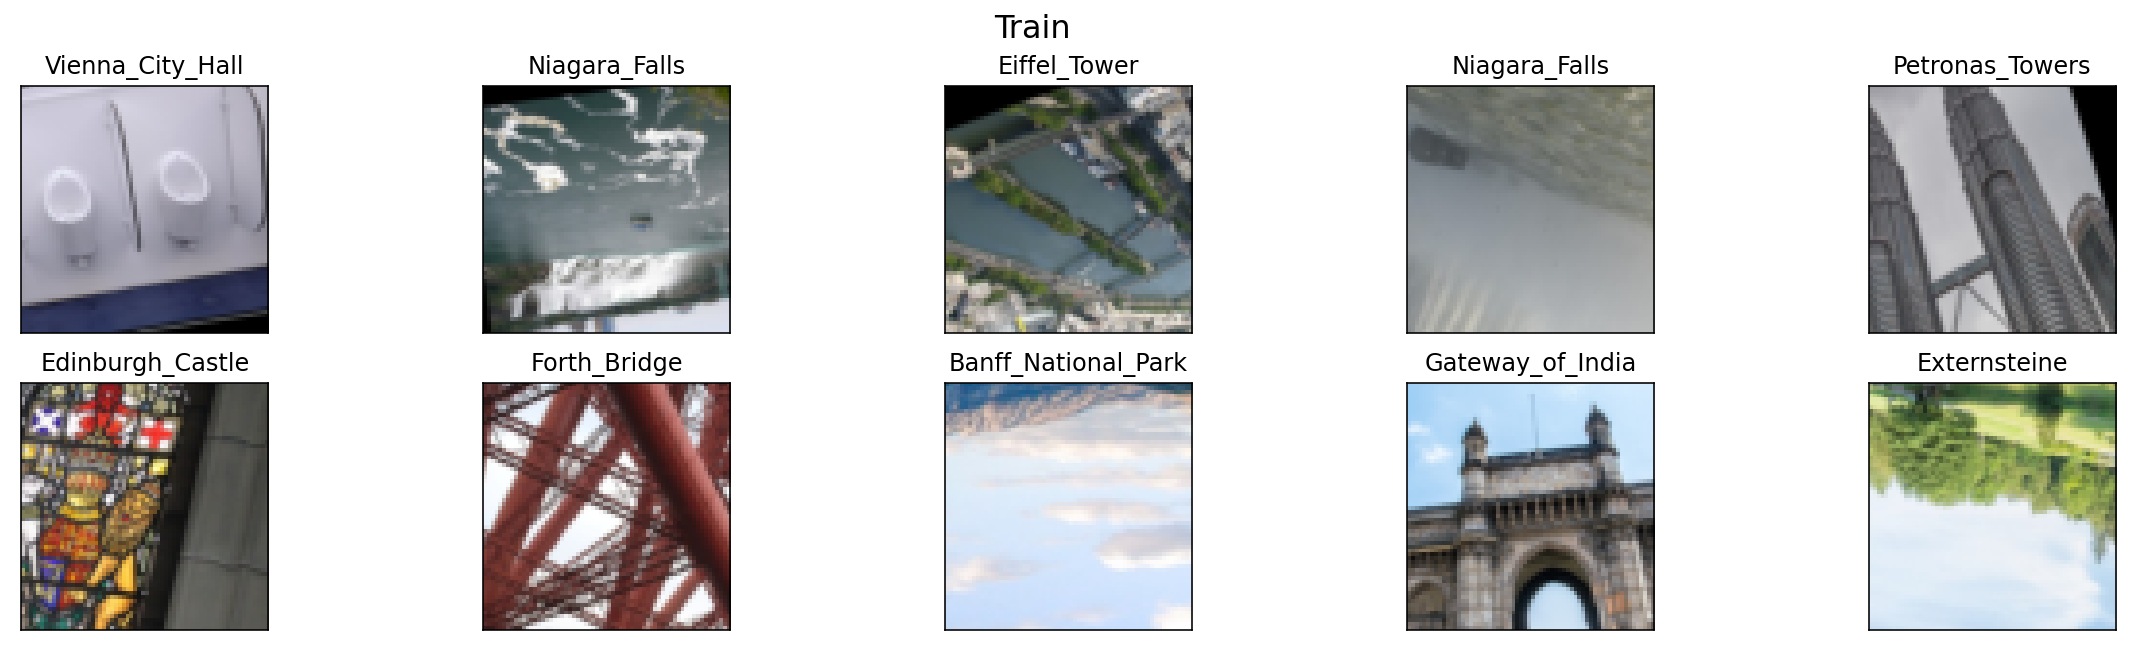

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

# train data

images, labels = next(iter(loaders_scratch['train']))
show_images(images,labels,title='Train',color_map='gray')

# images, labels = next(iter(loaders_scratch['test']))
# show_images(images,labels,title='Test')

## used for random...but we are already shuffling
# r = np.random.choice(range(images.shape[0]))
# print(r)
# print(images[r].shape)
# imshow(images[r])


### Initialize use_cuda variable

Steps
1. download & install the cuda toolkit
    * https://developer.nvidia.com/cuda-toolkit-archive
    * most newer versions should be fine
2. get the specific version of pytorch 
    * https://pytorch.org/get-started/locally/
    * pick your OS, Cuda version, and etc 
    * run the provided command

notes:  
Cuda is only for specific Nvidia GPUs

In [16]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [17]:
## TODO: select loss function
criterion_scratch = None

# #i do not have inputs of targets, yet
# #so i'll use this function when the time comes
# def get_criterion_scratch(input,target):
#     criterion_scratch = F.nll_loss(input=input,target=target)

# we used this one in the lesson
criterion_scratch = nn.CrossEntropyLoss()

#others to try
# criterion_scratch = nn.L1Loss()
# criterion_scratch = nn.NLLLoss()
# criterion_scratch = nn.MSELoss()
# criterion_scratch = nn.HingeEmbeddingLoss()


# def get_optimizer_scratch(model, learn_rate=0.001):
def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
    
    # others to try
    # optimizer = torch.optim.RMSprop(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adadelta(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adagrad(model.parameters(),lr=0.001)
    
    return optimizer
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [22]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()

        ## Define layers of a CNN

        # for between
        self.pool = nn.MaxPool2d(2,2)

        # # input is 3 (RGB)
        # # output channels to 9 (how thick out tensor will be)
        # # kernel is (3,3) ...so we will be looking at a 3x3 pixels at a time
        self.conv1 = nn.Conv2d(3,8,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(8,16,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(16,32,kernel_size=(3,3),stride=1,padding=1)
        self.conv4 = nn.Conv2d(32,64,kernel_size=(3,3),stride=1,padding=1)


        self.fc1 = nn.Linear(1024,50)



    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        x = F.relu(self.pool(self.conv4(x)))

        x = x.view(x.size(0),-1)
        
        # print(x.shape) #needed to find the correct shape for line ^23
        x = F.log_softmax(self.fc1(x), dim = 1)
        
        return x
    


#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
i'm using a group of convolutional layers and i'm increasing the output by 2x of the input.  
since i started with an image that is 256, it made sense to use multiples of 8.  
so 8,16,32,64,128 (i do think the 128 is a bit much... but let me run some tests and see how it works)  
between each of these convolutional i'm using the reLU activation function with a maxpool within it.  
...the maxpool will take the largest number out of the 2x2 kernel (i might increase this to 3x3, but lets see how this works)  
after it passes the conv, and maxpools  
i'll pass it through a linear layer, reLU and then softmax.  


### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            # this resets before back propagation
            optimizer.zero_grad()

            #get model output
            output = model(data)

            #calculate loss
            loss = criterion(output, target) 
            loss.backward()
            optimizer.step()

            #train based on loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))


        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:

            print('valid_loss: {:.10f}'.format(valid_loss))
            print('valid_loss_min: {:.10f}'.format(valid_loss_min))

            print('saving model')

            #save model
            torch.save(model.state_dict(), save_path)
            print('saved: ', save_path)

            valid_loss_min = valid_loss


        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [24]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy

    #get the name of the layer
    name = m.__class__.__name__
    print(name)
    if name.find('Linear') != -1:

        # get the number of the inputs
        y = (1.0/np.sqrt(m.in_features))

        m.weight.data.normal_(0, y)  
        m.bias.data.fill_(0)


#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
    criterion_scratch, use_cuda, 'ignore.pt')



MaxPool2d
Conv2d
Conv2d
Conv2d
Conv2d
Linear
Net


KeyboardInterrupt: 

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [25]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                    criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.912293 	Validation Loss: 3.912219
valid_loss: 3.9122188836
valid_loss_min: 3.9122188836
saving model
saved:  model_scratch.pt
Epoch: 2 	Training Loss: 3.912371 	Validation Loss: 3.912287
Epoch: 3 	Training Loss: 3.912357 	Validation Loss: 3.912434
Epoch: 4 	Training Loss: 3.912267 	Validation Loss: 3.912144
valid_loss: 3.9121444523
valid_loss_min: 3.9121444523
saving model
saved:  model_scratch.pt
Epoch: 5 	Training Loss: 3.912311 	Validation Loss: 3.912343
Epoch: 6 	Training Loss: 3.912269 	Validation Loss: 3.911867
valid_loss: 3.9118673950
valid_loss_min: 3.9118673950
saving model
saved:  model_scratch.pt
Epoch: 7 	Training Loss: 3.912270 	Validation Loss: 3.912252
Epoch: 8 	Training Loss: 3.912198 	Validation Loss: 3.911809
valid_loss: 3.9118090272
valid_loss_min: 3.9118090272
saving model
saved:  model_scratch.pt
Epoch: 9 	Training Loss: 3.912172 	Validation Loss: 3.912078
Epoch: 10 	Training Loss: 3.912174 	Validation Loss: 3.911951
Epoch: 11 	Training L

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [26]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.910957


Test Accuracy:  3% (16/506)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [27]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import numpy as np
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

loaders_transfer = {'train': None, 'valid': None, 'test': None}
loaders_transfer = loaders_scratch




### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [28]:
## TODO: select loss function
# criterion_scratch = None

# we used this one in the lesson
criterion_transfer = nn.CrossEntropyLoss()

#others to try
# criterion_transfer = nn.L1Loss()
# criterion_transfer = nn.NLLLoss()
# criterion_transfer = nn.MSELoss()
# criterion_transfer = nn.HingeEmbeddingLoss()


# def get_optimizer_scratch(model, learn_rate=0.001):
def get_optimizer_transfer(model):
    ## TODO: select and return an optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
    
    # others to try
    # optimizer = torch.optim.RMSprop(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adadelta(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    # optimizer = torch.optim.Adagrad(model.parameters(),lr=0.001)
    
    return optimizer

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [29]:
## TODO: Specify model architecture

# https://pytorch.org/vision/stable/models.html
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False
    


num_inputs = model_transfer.classifier[6].in_features
final_layer = nn.Linear(num_inputs, 50)

model_transfer.classifier[6] = final_layer

torch.save(model_transfer.state_dict(), 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

# print('loaders_transfer:', loaders_transfer)
# print('model_transfer:', loaders_transfer)
# print('get_optimizer_transfer(model_transfer):', get_optimizer_transfer(model_transfer))
# print('criterion_transfer:', criterion_transfer)
# print('use_cuda:', use_cuda)

print(model_transfer)
#this model needs color images!

model_transfer = train(20, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer),criterion_transfer, use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 3.103794


Test Accuracy: 20% (104/506)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [38]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN

    image = Image.open(img_path)
    i = transform0(image)
    # imshow(i)
    i = i[None,:]
    if use_cuda:
        i = i.cuda()
    p = model_transfer(i).cpu()
    p = p.detach().numpy()[0]

    p_sorted = p.copy()
    p_sorted.sort()
    p_sorted = p_sorted[-k:]
    p_sorted = np.flip(p_sorted)

    # print(p)
    # print(p_sorted)

    targets = list(range(k))
    for index,i in enumerate(p):
        if i in p_sorted:
            pos = np.where(p_sorted == i)[0]
            # print(pos)
            targets[pos[0]] = {'position':pos[0],'index':index,'value':i,'label':label_map[index]}
    # print(*targets,sep='\n')
    return targets




    


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

[{'position': 0,
  'index': 9,
  'value': 3.2051182,
  'label': 'Golden_Gate_Bridge'},
 {'position': 1, 'index': 38, 'value': 2.344755, 'label': 'Forth_Bridge'},
 {'position': 2, 'index': 37, 'value': 2.016064, 'label': 'Atomium'},
 {'position': 3, 'index': 16, 'value': 1.5645825, 'label': 'Eiffel_Tower'},
 {'position': 4,
  'index': 28,
  'value': 1.4401528,
  'label': 'Sydney_Harbour_Bridge'}]

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

img_path:  images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg
{'position': 0, 'index': 9, 'value': 4.8355494, 'label': 'Golden_Gate_Bridge'}
{'position': 1, 'index': 38, 'value': 3.9633944, 'label': 'Forth_Bridge'}
{'position': 2, 'index': 22, 'value': 3.148811, 'label': 'Moscow_Raceway'}


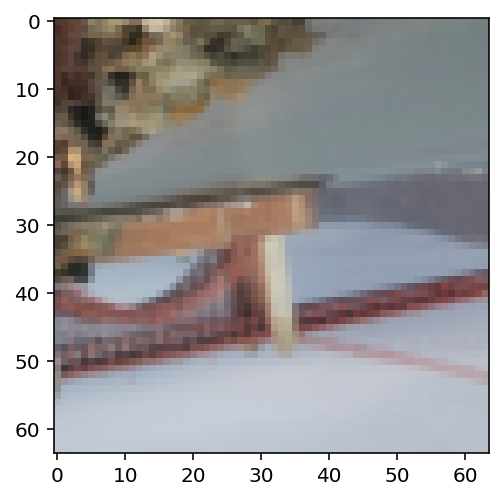

In [41]:
def suggest_locations(img_path):
    # get landmark predictions

    print('img_path: ',img_path)

    predicted_landmarks_list = predict_landmarks(img_path, 3)
    # print(type(predicted_landmarks_list))
    
    ## TODO: display image and display landmark predictions
    image = Image.open(img_path)
    i = transform0(image)
    imshow(i)

    print(*predicted_landmarks_list,sep='\n')

    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

img_path:  images/test/06.Niagara_Falls/3e804cba02881ce0.jpg
{'position': 0, 'index': 5, 'value': 2.116421, 'label': 'London_Olympic_Stadium'}
{'position': 1, 'index': 9, 'value': 1.8091338, 'label': 'Golden_Gate_Bridge'}
{'position': 2, 'index': 38, 'value': 1.7338378, 'label': 'Forth_Bridge'}


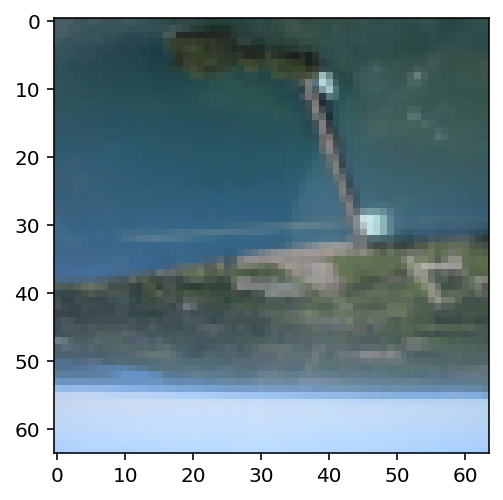

In [46]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

suggest_locations('images/test/06.Niagara_Falls/3e804cba02881ce0.jpg')

img_path:  images/test/16.Eiffel_Tower/42261807da88dd0c.jpg
{'position': 0, 'index': 14, 'value': 2.3296344, 'label': 'Terminal_Tower'}
{'position': 1, 'index': 33, 'value': 1.9881616, 'label': 'Sydney_Opera_House'}
{'position': 2, 'index': 16, 'value': 1.6394328, 'label': 'Eiffel_Tower'}


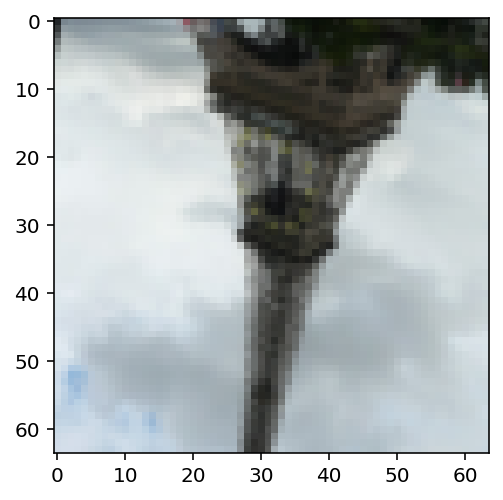

In [43]:
suggest_locations('images/test/16.Eiffel_Tower/42261807da88dd0c.jpg')

img_path:  images/test/26.Pont_du_Gard/4714300e3441fac2.jpg
{'position': 0, 'index': 0, 'value': 2.993962, 'label': 'Haleakala_National_Park'}
{'position': 1, 'index': 27, 'value': 2.857521, 'label': 'Seattle_Japanese_Garden'}
{'position': 2, 'index': 34, 'value': 2.3216622, 'label': 'Great_Barrier_Reef'}


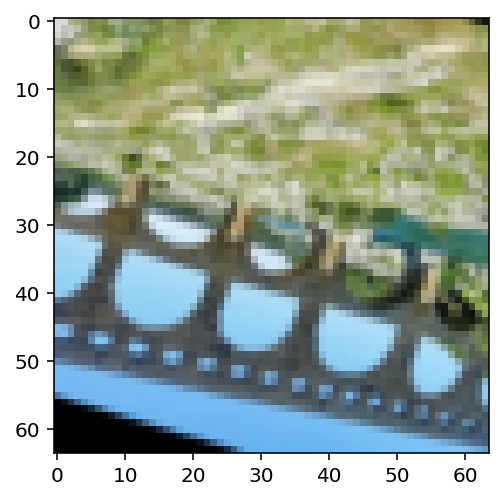

In [44]:
suggest_locations('images/test/26.Pont_du_Gard/4714300e3441fac2.jpg')

img_path:  images/test/36.Badlands_National_Park/01bb03705aaa2a5e.jpg
{'position': 0, 'index': 3, 'value': 3.7817903, 'label': 'Dead_Sea'}
{'position': 1, 'index': 36, 'value': 2.6650727, 'label': 'Badlands_National_Park'}
{'position': 2, 'index': 42, 'value': 2.5586445, 'label': 'Death_Valley_National_Park'}


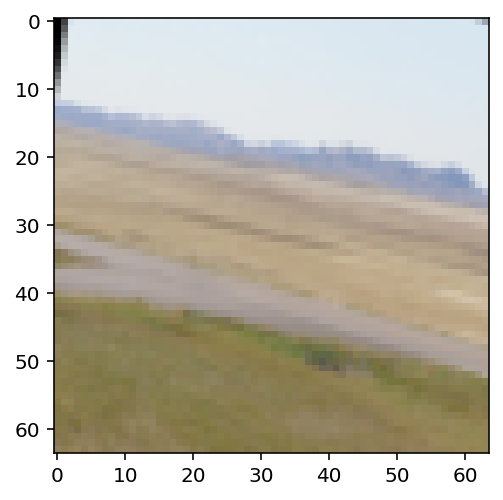

In [45]:
suggest_locations('images/test/36.Badlands_National_Park/01bb03705aaa2a5e.jpg')